# Task 1: Reinforcement learning on the FrozenLake-v1 environment (50 marks)


This assessment will focus on the FrozenLake-v1 environment. In this environment, the player
guides an agent in a grid with frozen surfaces and holes to retrieve a chest. Some tiles are slippery
which can cause the player to move in an undesirable direction. For more details, see the GitHub
page: https://github.com/openai/gym/blob/master/gym/envs/toy_text/frozen_lake.py

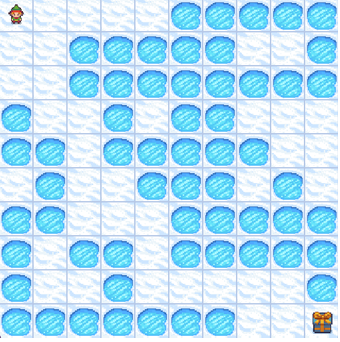

For this task, the students are required to generate a random 8x8 valid grid with a 30%
probability that a tile is frozen. Use the provided notebook (“submission.ipynb”) to initialize the
environment.

DO NOT PUT THE “is_slippery” PARAMETER TO FALSE OR
THE TOTAL MARK WILL BE REDUCED.

The group can make use of the provided YML file (“environment.yml”) to initialise their Anaconda
environment. Please use Python for all programming tasks. The students are encouraged to use
python-based frameworks, such as Tensorflow and Keras.

In [ ]:
#Library for environments
import gym
from gym.envs.registration import register
from gym.envs.toy_text.frozen_lake import generate_random_map

#Librairies to represent the output
from IPython.display import clear_output
import time
import matplotlib.pyplot as plt

#Essential libraries for computation
import numpy as np
import random
import tensorflow as tf
from collections import deque

We will use the following environment.

In [ ]:
random_map = generate_random_map(size=8, p=0.3)
env = gym.make("FrozenLake-v1", desc=random_map)
env.reset()
env.render()

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don

1.2) Implement an agent based on a neural network, using a parameter 𝜀, for making random
moves, that decreases from 1 to 0.1. Describe how you deployed your agent, the motivation
behind the design choices, and how you adjusted its parameters, going into detail on what
each parameter does as well. You may use open-source code and libraries if you
acknowledge them (15 marks).

In [ ]:
# Libraries for environments
import gym
from gym.envs.toy_text.frozen_lake import generate_random_map

# Libraries for machine learning and visualization
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate a random map and create the Frozen Lake environment
map_size = 8
random_map = generate_random_map(map_size, p=0.3)
print("MAP SIZE = ", map_size)
env = gym.make("FrozenLake-v1", desc=random_map, is_slippery=True)
env.reset()

# Parameters
state_size = env.observation_space.n
action_size = env.action_space.n
learning_rate = 0.001

# DQN Neural Network
class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.output = nn.Linear(64, action_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.output(x)

# Visualization setup
episode_rewards = []
episode_epsilons = []
episode_losses = []

# Initialize the DQN model, loss function, and optimizer
model = DQN(state_size, action_size)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()

# Epsilon-greedy parameters
epsilon = 1.0
epsilon_min = 0.1
epsilon_decay = 0.999

def choose_action(state, epsilon):
    if np.random.rand() <= epsilon:
        return env.action_space.sample()
    with torch.no_grad():
        q_values = model(torch.tensor(state, dtype=torch.float32))
    return torch.argmax(q_values).item()



MAP SIZE =  8


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


1.3) Train the agent created in 1.2 on the game. Please note that a high number of episodes may
be required for the agent to reach the goal depending on your implementation. Present the
training process, the experiments (including the experimental setting), and discuss your
results. You should make use of figures, including a line plot that shows how the average
amount of rewards over episodes evolves over time (5 marks).

Episode: 100, Total Reward: -1.000000, Epsilon: 0.1
Episode: 200, Total Reward: -1.000000, Epsilon: 0.1
Episode: 300, Total Reward: -1.000000, Epsilon: 0.1
Episode: 400, Total Reward: -1.000000, Epsilon: 0.1
Episode: 500, Total Reward: -1.000000, Epsilon: 0.1
Episode: 600, Total Reward: -1.000000, Epsilon: 0.1
Episode: 700, Total Reward: -1.000000, Epsilon: 0.1
Episode: 800, Total Reward: -1.000000, Epsilon: 0.1
Episode: 900, Total Reward: -1.000000, Epsilon: 0.1
Episode: 1000, Total Reward: -1.000000, Epsilon: 0.1
Episode: 1100, Total Reward: -1.000000, Epsilon: 0.1
Episode: 1200, Total Reward: -1.000000, Epsilon: 0.1
Episode: 1300, Total Reward: -1.000000, Epsilon: 0.1
Episode: 1400, Total Reward: -1.000000, Epsilon: 0.1
Episode: 1500, Total Reward: -1.000000, Epsilon: 0.1
Episode: 1600, Total Reward: -1.000000, Epsilon: 0.1
Episode: 1700, Total Reward: -1.000000, Epsilon: 0.1
Episode: 1800, Total Reward: -1.000000, Epsilon: 0.1
Episode: 1900, Total Reward: -1.000000, Epsilon: 0.1
Ep

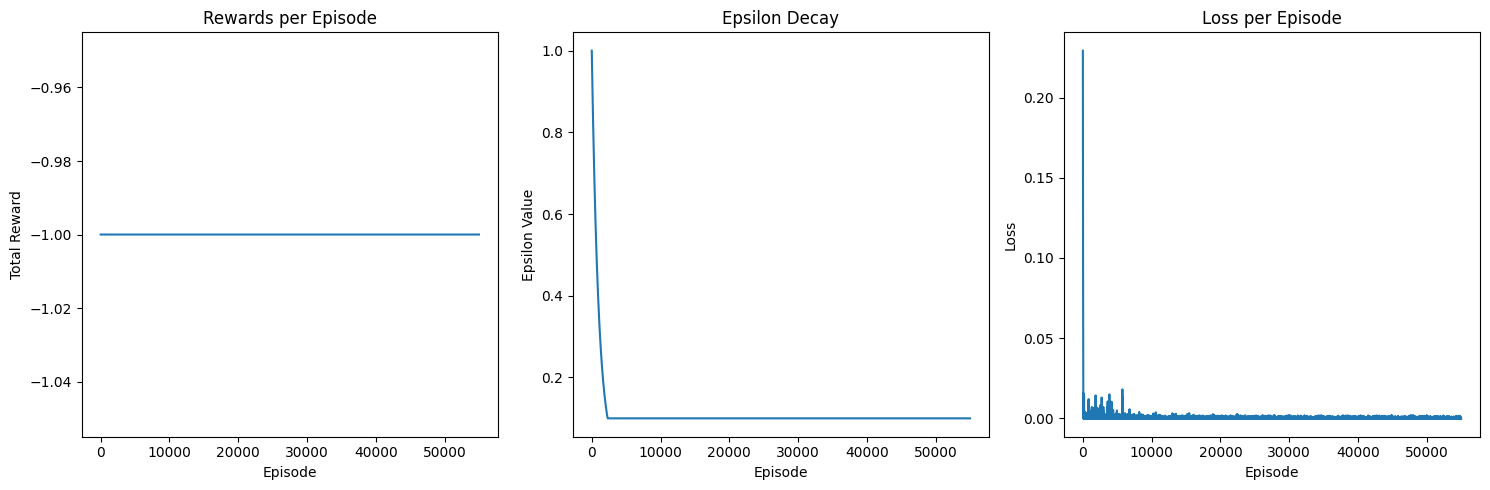

Total Reward in test episode: 0.0


<ipython-input-25-6061b5164aab>:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  q_values = model(torch.tensor(state, dtype=torch.float32))


In [ ]:
# Training parameters
num_episodes = 50000
gamma = 0.99

# Training loop
for episode in range(num_episodes):
    state = env.reset()
    state = np.identity(state_size)[state:state+1]
    total_reward = 0
    done = False
    episode_loss = 0

    for step in range(100):
        action = choose_action(state, epsilon)
        next_state, reward, done, _ = env.step(action)
        next_state = np.identity(state_size)[next_state:next_state+1]

        # Modified reward structure
        if done and reward == 0:  # Fell into a hole
            reward = -1
        elif done and reward == 1:  # Reached the goal
            reward = 10

        current_q = model(torch.tensor(state, dtype=torch.float32))
        next_q = model(torch.tensor(next_state, dtype=torch.float32))

        target_q = current_q.clone()
        if done:
            target_q[0, action] = reward
        else:
            target_q[0, action] = reward + gamma * torch.max(next_q)

        loss = loss_fn(current_q, target_q)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        state = next_state
        total_reward += reward
        episode_loss += loss.item()

        if done:
            break

    # Track metrics for visualization
    episode_rewards.append(total_reward)
    episode_epsilons.append(epsilon)
    episode_losses.append(episode_loss)

    # Decay epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Display results occasionally
    if (episode + 1) % 100 == 0:
        print(f"Episode: {episode + 1}, Total Reward: {total_reward:2f}, Epsilon: {epsilon}")

# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(episode_rewards)
plt.title('Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

plt.subplot(132)
plt.plot(episode_epsilons)
plt.title('Epsilon Decay')
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')

plt.subplot(133)
plt.plot(episode_losses)
plt.title('Loss per Episode')
plt.xlabel('Episode')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# Run a post-training episode to test the learned policy
state = env.reset()
done = False
total_reward = 0
while not done:
    state_tensor = torch.tensor(np.identity(state_size)[state:state+1], dtype=torch.float32)
    action = choose_action(state_tensor, epsilon=0.1)
    next_state, reward, done, _ = env.step(action)
    total_reward += reward
    state = next_state

env.close()
print(f"Total Reward in test episode: {total_reward}")

1.4) Randomly relying on the exploration of the grid can be a time-consuming process.
Implement another agent, using ANY technique of your choice, which is aware of another
additional information: The position of the chest at the bottom right corner. The agent
should not cheat, i.e., they should not (at least initially) be aware of the layout of the map,
i.e., the positions of the holes. Explain all design choices that were made to create this agent

MAP SIZE =  8
Episode: 100, Total Reward: -1.000000, Epsilon: 0.9047921471137096
Episode: 200, Total Reward: -1.000000, Epsilon: 0.818648829478636
Episode: 300, Total Reward: -1.000000, Epsilon: 0.7407070321560997
Episode: 400, Total Reward: -1.000000, Epsilon: 0.6701859060067403
Episode: 500, Total Reward: -1.000000, Epsilon: 0.6063789448611848
Episode: 600, Total Reward: -1.000000, Epsilon: 0.5486469074854965
Episode: 700, Total Reward: -1.000000, Epsilon: 0.4964114134310989
Episode: 800, Total Reward: -1.000000, Epsilon: 0.4491491486100748
Episode: 900, Total Reward: -1.000000, Epsilon: 0.4063866225452039
Episode: 1000, Total Reward: -1.000000, Epsilon: 0.3676954247709635
Episode: 1100, Total Reward: -1.000000, Epsilon: 0.33268793286240766
Episode: 1200, Total Reward: -1.000000, Epsilon: 0.3010134290933992
Episode: 1300, Total Reward: -1.000000, Epsilon: 0.27235458681947705
Episode: 1400, Total Reward: -1.000000, Epsilon: 0.24642429138466176
Episode: 1500, Total Reward: -1.000000, E

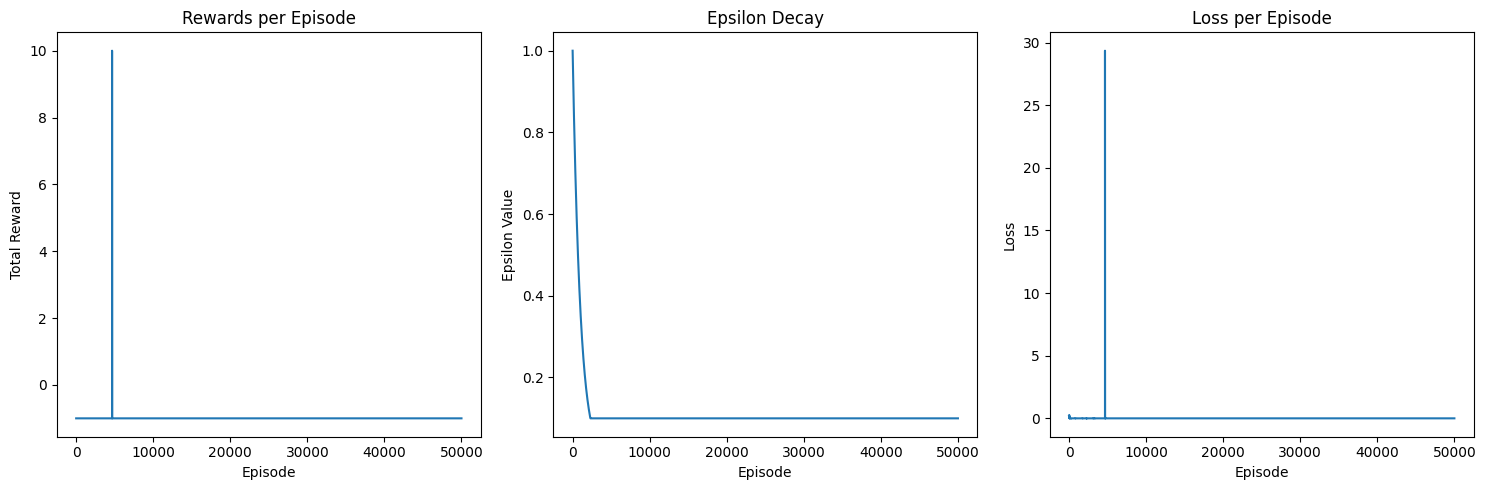

Total Reward in test episode: 0.0


In [ ]:
# Libraries for environments
import gym
from gym.envs.toy_text.frozen_lake import generate_random_map

# Libraries for machine learning and visualization
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import heapq

class AStarAgent:
    def __init__(self, map_size):
        self.map_size = map_size
        self.goal = (map_size - 1, map_size - 1)  # Bottom right corner

        # Possible actions: Left, Down, Right, Up
        self.actions = [0, 1, 2, 3]

        # Action effects (how each action changes position)
        self.action_effects = {
            0: (0, -1),  # Left
            1: (1, 0),   # Down
            2: (0, 1),   # Right
            3: (-1, 0)   # Up
        }

    def heuristic(self, current_pos):
        """Manhattan distance heuristic to the goal"""
        return abs(current_pos[0] - self.goal[0]) + abs(current_pos[1] - self.goal[1])

    def get_neighbors(self, state):
        """Get possible neighboring states"""
        neighbors = []
        current_pos = self.state_to_pos(state)

        for action in self.actions:
            dx, dy = self.action_effects[action]
            new_x, new_y = current_pos[0] + dx, current_pos[1] + dy

            # Check if move is within grid
            if 0 <= new_x < self.map_size and 0 <= new_y < self.map_size:
                new_state = self.pos_to_state(new_x, new_y)
                neighbors.append((action, new_state))

        return neighbors

    def state_to_pos(self, state):
        """Convert state number to (x, y) position"""
        return (state % self.map_size, state // self.map_size)

    def pos_to_state(self, x, y):
        """Convert (x, y) position to state number"""
        return y * self.map_size + x

    def astar_search(self, start_state):
        """A* search algorithm to find path to goal"""
        start_pos = self.state_to_pos(start_state)

        # Priority queue to store states to explore
        open_set = []
        heapq.heappush(open_set, (0, start_state, []))

        # Track visited states to avoid revisiting
        closed_set = set()

        while open_set:
            _, current_state, path = heapq.heappop(open_set)

            # Check if goal reached
            if current_state == self.pos_to_state(*self.goal):
                return path

            # Skip if already visited
            if current_state in closed_set:
                continue
            closed_set.add(current_state)

            # Explore neighbors
            for action, next_state in self.get_neighbors(current_state):
                if next_state not in closed_set:
                    new_path = path + [action]
                    priority = len(new_path) + self.heuristic(self.state_to_pos(next_state))
                    heapq.heappush(open_set, (priority, next_state, new_path))

        return None  # No path found

# DQN Neural Network
class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.output = nn.Linear(64, action_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.output(x)

# Hybrid Trainer
class HybridTrainer:
    def __init__(self, env, model, map_size):
        self.env = env
        self.model = model
        self.astar_agent = AStarAgent(map_size)
        self.state_size = env.observation_space.n

    def hybrid_choose_action(self, state, epsilon):
        """
        Hybrid action selection:
        - Use A* path if available
        - Fall back to DQN exploration/exploitation
        """
        # Try A* path first
        astar_path = self.astar_agent.astar_search(state)

        if astar_path and len(astar_path) > 0:
            return astar_path[0]

        # Fallback to DQN action selection
        if np.random.rand() <= epsilon:
            return self.env.action_space.sample()

        with torch.no_grad():
            q_values = self.model(torch.tensor(np.identity(self.state_size)[state:state+1], dtype=torch.float32))

        return torch.argmax(q_values).item()

# Generate environment
map_size = 8
random_map = generate_random_map(map_size, p=0.3)
print("MAP SIZE = ", map_size)
env = gym.make("FrozenLake-v1", desc=random_map, is_slippery=True)
env.reset()

# Parameters
state_size = env.observation_space.n
action_size = env.action_space.n
learning_rate = 0.001

# Visualization setup
episode_rewards = []
episode_epsilons = []
episode_losses = []

# Initialize the DQN model, loss function, and optimizer
model = DQN(state_size, action_size)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()

# Create Hybrid Trainer
hybrid_trainer = HybridTrainer(env, model, map_size)

# Epsilon-greedy parameters
epsilon = 1.0
epsilon_min = 0.1
epsilon_decay = 0.999

# Training parameters
num_episodes = 50000
gamma = 0.99

# Training loop
for episode in range(num_episodes):
    state = env.reset()
    state_tensor = np.identity(state_size)[state:state+1]
    total_reward = 0
    done = False
    episode_loss = 0

    for step in range(100):
        # Use hybrid action selection
        action = hybrid_trainer.hybrid_choose_action(state, epsilon)

        # Take action and observe results
        next_state, reward, done, _ = env.step(action)
        next_state_tensor = np.identity(state_size)[next_state:next_state+1]

        # Modified reward structure
        if done and reward == 0:  # Fell into a hole
            reward = -1
        elif done and reward == 1:  # Reached the goal
            reward = 10

        # Predict Q-values for current and next states
        current_q = model(torch.tensor(state_tensor, dtype=torch.float32))
        next_q = model(torch.tensor(next_state_tensor, dtype=torch.float32))

        # Compute target Q-value
        target_q = current_q.clone()
        if done:
            target_q[0, action] = reward
        else:
            target_q[0, action] = reward + gamma * torch.max(next_q)

        # Compute the loss and update the network
        loss = loss_fn(current_q, target_q)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update state
        state = next_state
        state_tensor = next_state_tensor
        total_reward += reward
        episode_loss += loss.item()

        if done:
            break

    # Track metrics for visualization
    episode_rewards.append(total_reward)
    episode_epsilons.append(epsilon)
    episode_losses.append(episode_loss)

    # Decay epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Display results occasionally
    if (episode + 1) % 100 == 0:
        print(f"Episode: {episode + 1}, Total Reward: {total_reward:2f}, Epsilon: {epsilon}")

# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(episode_rewards)
plt.title('Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

plt.subplot(132)
plt.plot(episode_epsilons)
plt.title('Epsilon Decay')
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')

plt.subplot(133)
plt.plot(episode_losses)
plt.title('Loss per Episode')
plt.xlabel('Episode')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# Run a post-training episode to test the learned policy
state = env.reset()
done = False
total_reward = 0
while not done:
    state_tensor = torch.tensor(np.identity(state_size)[state:state+1], dtype=torch.float32)
    action = hybrid_trainer.hybrid_choose_action(state, epsilon=0.1)
    next_state, reward, done, _ = env.step(action)
    total_reward += reward
    state = next_state

env.close()
print(f"Total Reward in test episode: {total_reward}")

In [ ]:
pip install gym[all] IPython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 10.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successful

MAP SIZE =  8


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Episode: 100, Total Reward: -1.000000, Epsilon: 0.9047921471137096
Episode: 200, Total Reward: -1.000000, Epsilon: 0.818648829478636
Episode: 300, Total Reward: -1.000000, Epsilon: 0.7407070321560997
Episode: 400, Total Reward: -1.000000, Epsilon: 0.6701859060067403
Episode: 500, Total Reward: -1.000000, Epsilon: 0.6063789448611848
Episode: 600, Total Reward: -1.000000, Epsilon: 0.5486469074854965
Episode: 700, Total Reward: -1.000000, Epsilon: 0.4964114134310989
Episode: 800, Total Reward: -1.000000, Epsilon: 0.4491491486100748
Episode: 900, Total Reward: -1.000000, Epsilon: 0.4063866225452039
Episode: 1000, Total Reward: -1.000000, Epsilon: 0.3676954247709635
Episode: 1100, Total Reward: -1.000000, Epsilon: 0.33268793286240766
Episode: 1200, Total Reward: -1.000000, Epsilon: 0.3010134290933992
Episode: 1300, Total Reward: -1.000000, Epsilon: 0.27235458681947705
Episode: 1400, Total Reward: -1.000000, Epsilon: 0.24642429138466176
Episode: 1500, Total Reward: -1.000000, Epsilon: 0.2229

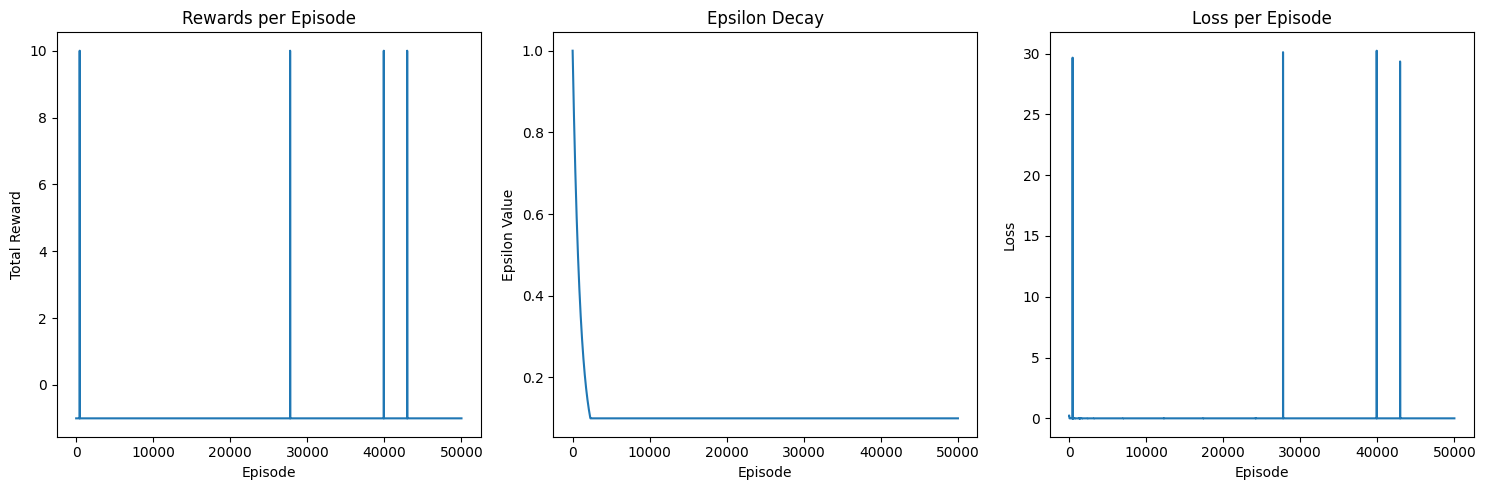

Total Reward in test episode: 0.0
Recording successful episode...


/usr/local/lib/python3.10/dist-packages/gym/wrappers/record_video.py:78: UserWarning: WARN: Overwriting existing videos at /content/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Recorded episode reward: 0.0


In [ ]:
# Libraries for environments
import gym
from gym.envs.toy_text.frozen_lake import generate_random_map

# Libraries for machine learning and visualization
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import heapq
from gym.wrappers import RecordVideo
import base64
from IPython.display import HTML
import io
from pathlib import Path

class AStarAgent:
    def __init__(self, map_size):
        self.map_size = map_size
        self.goal = (map_size - 1, map_size - 1)  # Bottom right corner

        # Possible actions: Left, Down, Right, Up
        self.actions = [0, 1, 2, 3]

        # Action effects (how each action changes position)
        self.action_effects = {
            0: (0, -1),  # Left
            1: (1, 0),   # Down
            2: (0, 1),   # Right
            3: (-1, 0)   # Up
        }

    def heuristic(self, current_pos):
        """Manhattan distance heuristic to the goal"""
        return abs(current_pos[0] - self.goal[0]) + abs(current_pos[1] - self.goal[1])

    def get_neighbors(self, state):
        """Get possible neighboring states"""
        neighbors = []
        current_pos = self.state_to_pos(state)

        for action in self.actions:
            dx, dy = self.action_effects[action]
            new_x, new_y = current_pos[0] + dx, current_pos[1] + dy

            # Check if move is within grid
            if 0 <= new_x < self.map_size and 0 <= new_y < self.map_size:
                new_state = self.pos_to_state(new_x, new_y)
                neighbors.append((action, new_state))

        return neighbors

    def state_to_pos(self, state):
        """Convert state number to (x, y) position"""
        return (state % self.map_size, state // self.map_size)

    def pos_to_state(self, x, y):
        """Convert (x, y) position to state number"""
        return y * self.map_size + x

    def astar_search(self, start_state):
        """A* search algorithm to find path to goal"""
        start_pos = self.state_to_pos(start_state)

        # Priority queue to store states to explore
        open_set = []
        heapq.heappush(open_set, (0, start_state, []))

        # Track visited states to avoid revisiting
        closed_set = set()

        while open_set:
            _, current_state, path = heapq.heappop(open_set)

            # Check if goal reached
            if current_state == self.pos_to_state(*self.goal):
                return path

            # Skip if already visited
            if current_state in closed_set:
                continue
            closed_set.add(current_state)

            # Explore neighbors
            for action, next_state in self.get_neighbors(current_state):
                if next_state not in closed_set:
                    new_path = path + [action]
                    priority = len(new_path) + self.heuristic(self.state_to_pos(next_state))
                    heapq.heappush(open_set, (priority, next_state, new_path))

        return None  # No path found

# DQN Neural Network
class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.output = nn.Linear(64, action_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.output(x)

# Hybrid Trainer
class HybridTrainer:
    def __init__(self, env, model, map_size):
        self.env = env
        self.model = model
        self.astar_agent = AStarAgent(map_size)
        self.state_size = env.observation_space.n

    def hybrid_choose_action(self, state, epsilon):
        """
        Hybrid action selection:
        - Use A* path if available
        - Fall back to DQN exploration/exploitation
        """
        # Try A* path first
        astar_path = self.astar_agent.astar_search(state)

        if astar_path and len(astar_path) > 0:
            return astar_path[0]

        # Fallback to DQN action selection
        if np.random.rand() <= epsilon:
            return self.env.action_space.sample()

        with torch.no_grad():
            q_values = self.model(torch.tensor(np.identity(self.state_size)[state:state+1], dtype=torch.float32))

        return torch.argmax(q_values).item()

# Generate environment
map_size = 8
random_map = generate_random_map(map_size, p=0.3)
print("MAP SIZE = ", map_size)
env = gym.make("FrozenLake-v1", desc=random_map, is_slippery=True)
env.reset()

# Parameters
state_size = env.observation_space.n
action_size = env.action_space.n
learning_rate = 0.001

# Visualization setup
episode_rewards = []
episode_epsilons = []
episode_losses = []

# Initialize the DQN model, loss function, and optimizer
model = DQN(state_size, action_size)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()

# Create Hybrid Trainer
hybrid_trainer = HybridTrainer(env, model, map_size)

# Epsilon-greedy parameters
epsilon = 1.0
epsilon_min = 0.1
epsilon_decay = 0.999

# Training parameters
num_episodes = 50000
gamma = 0.99

# Training loop
for episode in range(num_episodes):
    state = env.reset()
    state_tensor = np.identity(state_size)[state:state+1]
    total_reward = 0
    done = False
    episode_loss = 0

    for step in range(100):
        # Use hybrid action selection
        action = hybrid_trainer.hybrid_choose_action(state, epsilon)

        # Take action and observe results
        next_state, reward, done, _ = env.step(action)
        next_state_tensor = np.identity(state_size)[next_state:next_state+1]

        # Modified reward structure
        if done and reward == 0:  # Fell into a hole
            reward = -1
        elif done and reward == 1:  # Reached the goal
            reward = 10

        # Predict Q-values for current and next states
        current_q = model(torch.tensor(state_tensor, dtype=torch.float32))
        next_q = model(torch.tensor(next_state_tensor, dtype=torch.float32))

        # Compute target Q-value
        target_q = current_q.clone()
        if done:
            target_q[0, action] = reward
        else:
            target_q[0, action] = reward + gamma * torch.max(next_q)

        # Compute the loss and update the network
        loss = loss_fn(current_q, target_q)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update state
        state = next_state
        state_tensor = next_state_tensor
        total_reward += reward
        episode_loss += loss.item()

        if done:
            break

    # Track metrics for visualization
    episode_rewards.append(total_reward)
    episode_epsilons.append(epsilon)
    episode_losses.append(episode_loss)

    # Decay epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Display results occasionally
    if (episode + 1) % 100 == 0:
        print(f"Episode: {episode + 1}, Total Reward: {total_reward:2f}, Epsilon: {epsilon}")

# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(episode_rewards)
plt.title('Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

plt.subplot(132)
plt.plot(episode_epsilons)
plt.title('Epsilon Decay')
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')

plt.subplot(133)
plt.plot(episode_losses)
plt.title('Loss per Episode')
plt.xlabel('Episode')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# Run a post-training episode to test the learned policy
# Keep your existing final test episode code
state = env.reset()
done = False
total_reward = 0
while not done:
    state_tensor = torch.tensor(np.identity(state_size)[state:state+1], dtype=torch.float32)
    action = hybrid_trainer.hybrid_choose_action(state, epsilon=0.1)
    next_state, reward, done, _ = env.step(action)
    total_reward += reward
    state = next_state

print(f"Total Reward in test episode: {total_reward}")

# Now add the video recording for successful episodes
def record_successful_episode(trainer, epsilon=0.1):
    """Record a successful episode using the trained policy"""
    # Create a new environment instance with recording wrapper
    recording_env = gym.make("FrozenLake-v1",
                           desc=trainer.env.desc,
                           is_slippery=True,
                           render_mode="rgb_array")
    recording_env = RecordVideo(recording_env,
                              video_folder="./videos",
                              episode_trigger=lambda x: True)

    state = recording_env.reset()
    done = False
    total_reward = 0

    while not done:
        action = trainer.hybrid_choose_action(state, epsilon)
        next_state, reward, done, _ = recording_env.step(action)
        total_reward += reward
        state = next_state

    recording_env.close()
    return total_reward

# Function to display the video in Jupyter Notebook
def display_video(video_path):
    """Display the recorded video in a Jupyter notebook"""
    video = io.open(video_path, 'r+b').read()
    encoded = base64.b64encode(video)
    return HTML(data='''
        <video width="640" height="480" controls>
            <source src="data:video/mp4;base64,{}" type="video/mp4">
        </video>
    '''.format(encoded.decode('ascii')))

# Create videos directory if it doesn't exist
os.makedirs("./videos", exist_ok=True)

# Record a successful episode
print("Recording successful episode...")
reward = record_successful_episode(hybrid_trainer, epsilon=0.1)
print(f"Recorded episode reward: {reward}")

try:
    # Display the latest recorded video
    videos_dir = Path('./videos')
    if videos_dir.exists():
        video_files = list(videos_dir.glob("*.mp4"))
        if video_files:
            latest_video = sorted(video_files, key=os.path.getmtime)[-1]
            display_video(str(latest_video))
        else:
            print("No video files found in the videos directory.")
    else:
        print("Videos directory not found.")
except Exception as e:
    print(f"Error displaying video: {str(e)}")